<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Diamond
</font>
</h1>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Importing Packages
</font>
</h2>

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Data set
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Explanation of each column in data set
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|feature|discription|
|:------:|:---:|
|<code>carat</code>|the weight of diamond in carat|
|<code>cut</code>|the quality of carving|
|<code>color</code>|color of diamond from J (the worst) to D (the best)|
|<code>clarity</code>|scale of clarity from left (the worst) to the right (the best): I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF|
|<code>x</code>|length of diamond in millimeter|
|<code>y</code>|width of diamond in millimeter|
|<code>z</code>|depth of diamond in millimeter|
|<code>depth</code>|depth percentage = z / mean(x,y)|
|<code>table</code>|width of the widest place in diamond|
|<code>price</code>|price|

</font>
</div>
</center>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Select and reading the data set
</font>
</h2>

In [4]:
train = pd.read_csv('../data/diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


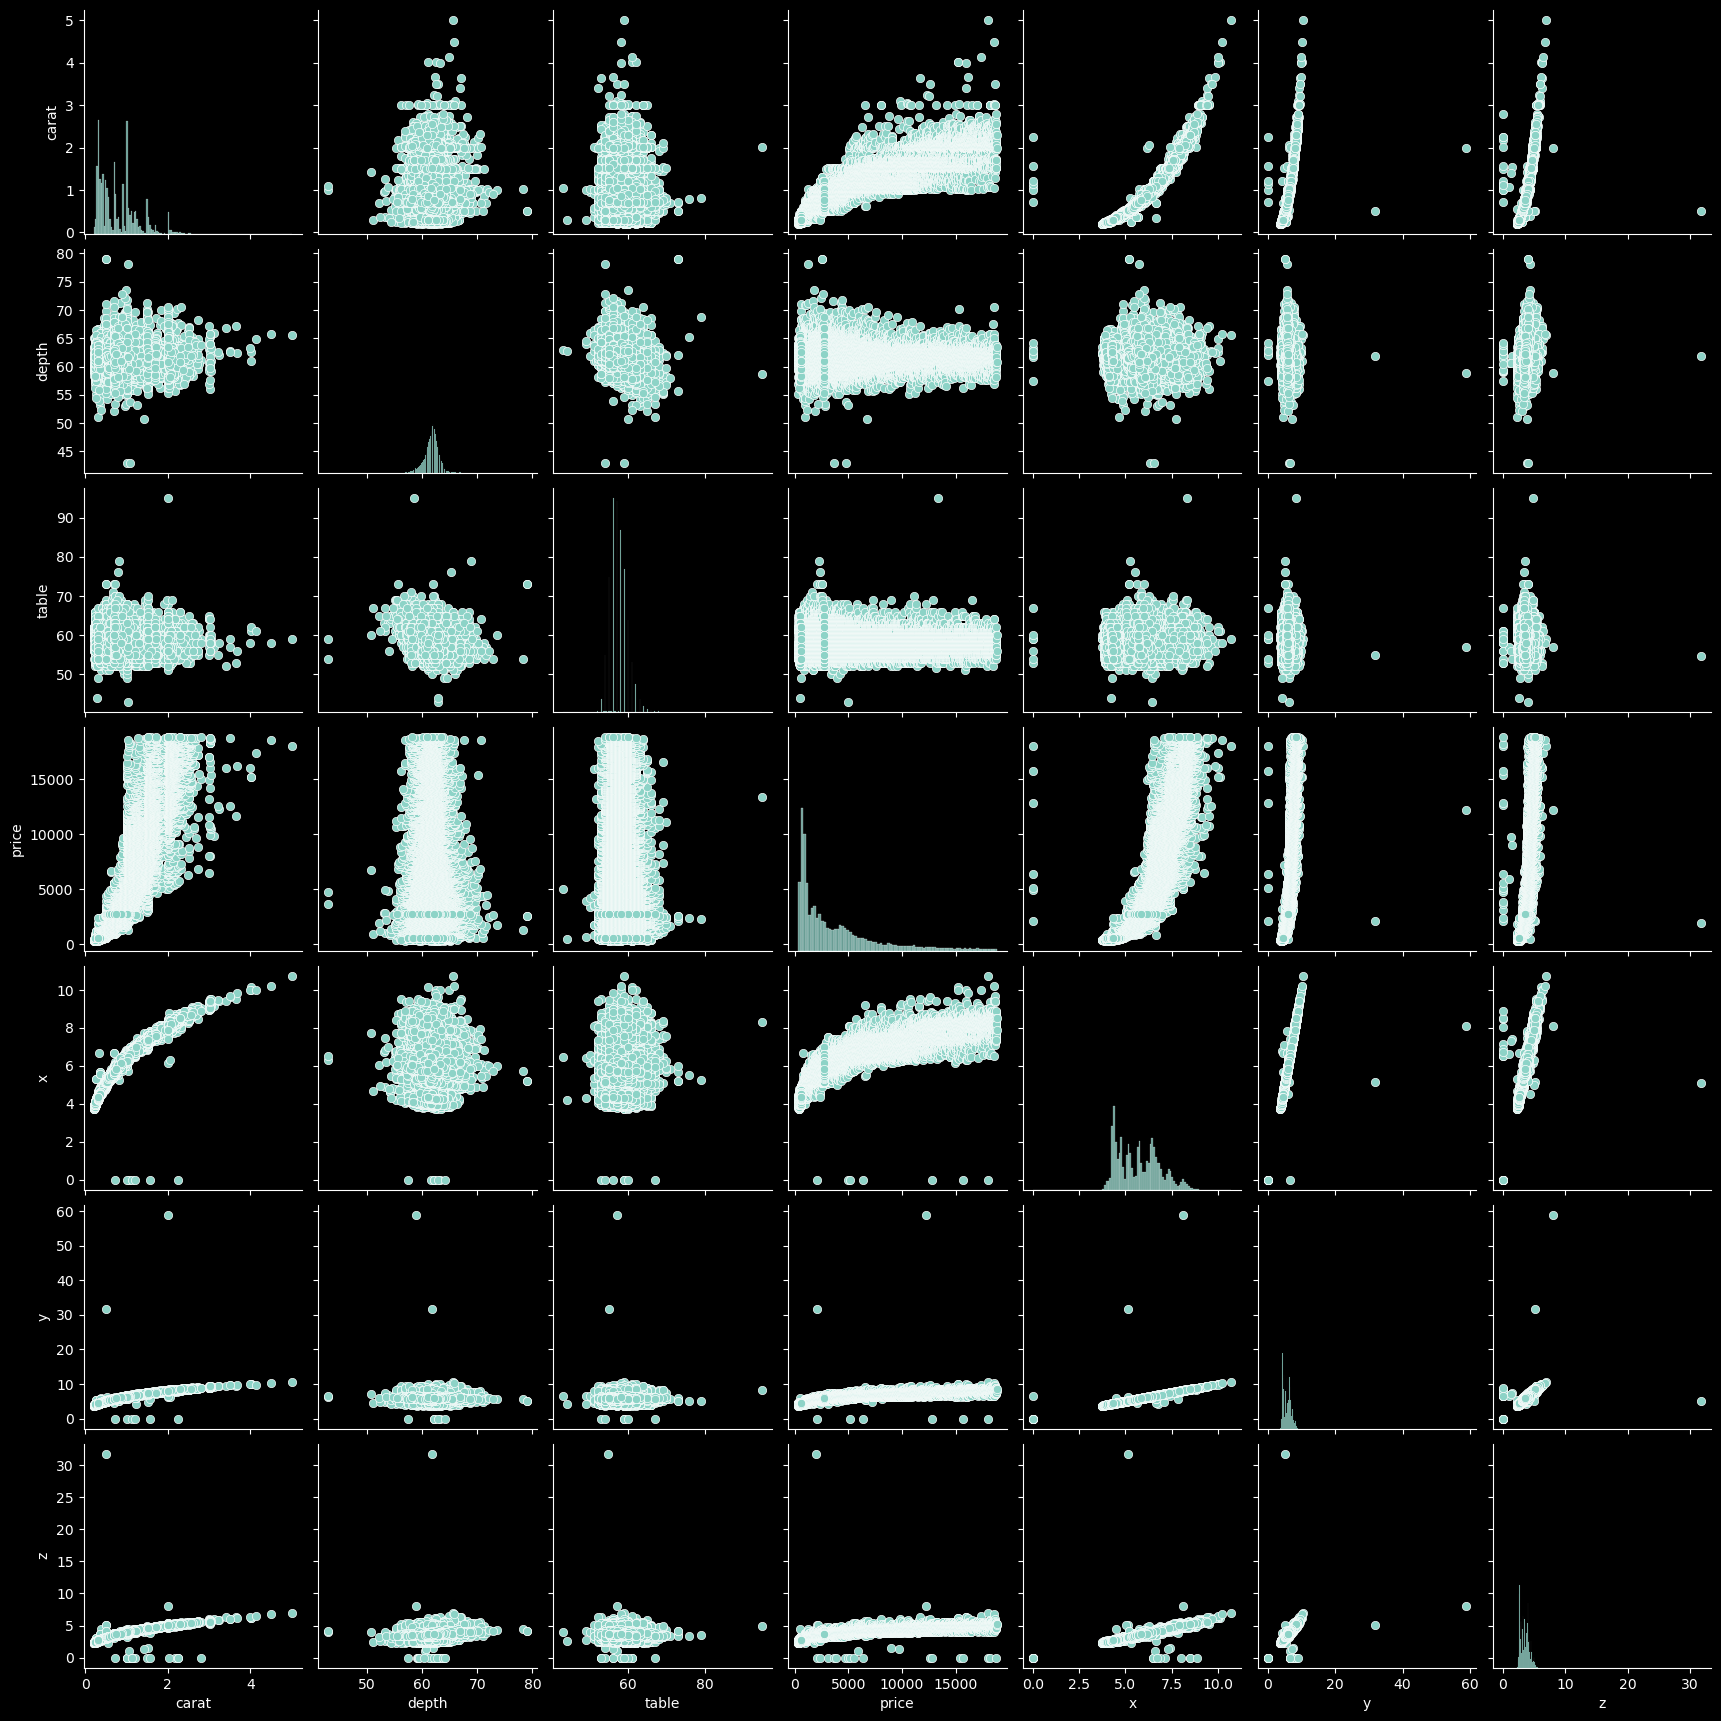

In [5]:
sns.pairplot(train)

In [6]:
test = pd.read_csv('../data/diamonds_test.csv') # TO-DO
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


In [7]:
train['clarity'].value_counts()

clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Preprocessing & Feature engineering
</font>
</h2>

In [8]:
# Do some preprocessing for train!
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
color_mapping = {
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0,
    'H': -1,
    'I': -2,
    'J': -3
}
clarity_mapping = {
    'I1': -4,
    'SI2': -3,
    'SI1': -2,
    'VS2': -1,
    'VS1': 1,
    'VVS2': 2,
    'VVS1': 3,
    'IF': 4
}
train_mapped_df = train.copy()
train_mapped_df['cut'] = train_mapped_df['cut'].map(cut_mapping)
train_mapped_df['color'] = train_mapped_df['color'].map(color_mapping)
train_mapped_df['clarity'] = train_mapped_df['clarity'].map(clarity_mapping)
train_mapped_df.drop(columns='price', inplace=True)
test_mapped_df = test.copy()
test_mapped_df['cut'] = test_mapped_df['cut'].map(cut_mapping)
test_mapped_df['color'] = test_mapped_df['color'].map(color_mapping)
test_mapped_df['clarity'] = test_mapped_df['clarity'].map(clarity_mapping)
train_mapped_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,2,-3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,2,-2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,2,1,56.9,65.0,4.05,4.07,2.31
3,0.29,3,-2,-1,62.4,58.0,4.20,4.23,2.63
4,0.31,1,-3,-3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,4,3,-2,60.8,57.0,5.75,5.76,3.50
49996,0.72,1,3,-2,63.1,55.0,5.69,5.75,3.61
49997,0.70,2,3,-2,62.8,60.0,5.66,5.68,3.56
49998,0.86,3,-1,-3,61.0,58.0,6.15,6.12,3.74


In [9]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
normalization = MinMaxScaler()
standardization = StandardScaler()
train_scaled = pd.DataFrame()
train_scaled[['carat', 'depth', 'table', 'x', 'y', 'z']] = normalization.fit_transform(train_mapped_df[['carat', 'depth', 'table', 'x', 'y', 'z']])
train_scaled[['cut', 'color', 'clarity']] = standardization.fit_transform(train_mapped_df[['cut', 'color', 'clarity']])
train_scaled

,carat,depth,table,x,y,z,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.982622,0.940237,-1.162452
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.087131,0.940237,-0.676717
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,-1.703850,0.940237,0.780489
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.087131,-1.412150,-0.190981
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,-1.703850,-2.000246,-1.162452
...,...,...,...,...,...,...,...,...,...
49995,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,0.982622,1.528334,-0.676717
49996,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,-1.703850,1.528334,-0.676717
49997,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,-0.808359,1.528334,-0.676717
49998,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,0.087131,-0.824053,-1.162452


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Modeling
</font>
</h2>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(train_scaled, train['price'], test_size=0.002)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [12]:
y_test.shape

(100,)

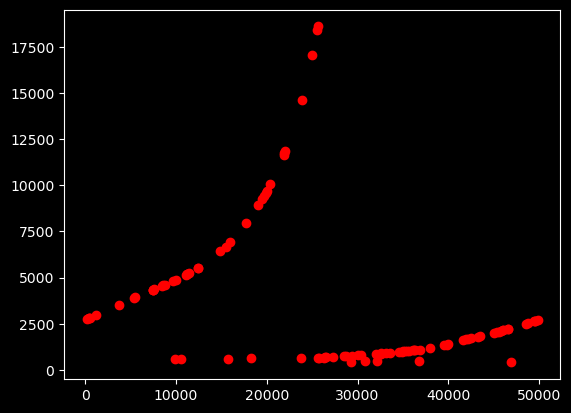

In [14]:
fig, ax = plt.subplots()
ax.scatter(x_test.index, y_test, c='red')

<h3 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Evaluation
</font>
</h3>

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9183698629755405